In [1]:
# import modules to be used in this notebook
#   numpy is a math library, mercury is an app library for jupyter notebooks
import numpy as np
import mercury as mr

# for general plots, including static plots
import matplotlib.pyplot as plt

# for animated plots
import matplotlib.animation as animation
from IPython import display

# initiate web-app with mercury
app = mr.App(title="Diffusion on Lattice", description="Random walk model", show_code=False)

mercury.App

### Random walk in 2D

In [5]:
# Run random walk on a 2D lattice
# add Mercury widgets
import sys
sys.path.append('/home/wwwennie/wwwennie@gmail.com/UT-Austin/teaching/Elective-Computational-Methods-MatSci/projects/1-random-walk-mercury/')

from lattice_2D import random_walk
lattice = mr.Select(label="Choose a 2D lattice: ", value="square",choices=["square","triangle"])
num_steps = mr.Numeric(value=1e2,min=0,max=1e3,label="Enter the number of steps in the simulation:")
disp = mr.Select(label="Choose a display type:", value="static (fast)", choices=["static (fast)","interactive (slow)"])

mercury.Select

mercury.Numeric

mercury.Select

In [3]:
# convert float to integer
nsteps = int(num_steps.value)
# run the random walk simulation
rs2, x, y = random_walk(nsteps,latt_type=lattice.value)

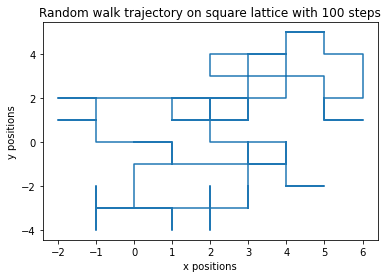

In [4]:
## display the results
if disp.value == "static (fast)":
    ## a  static plot of the results
    label = 'Steps = {}'.format(nsteps)
    _ = plt.title(f"Random walk trajectory on {lattice.value} lattice with {nsteps} steps")
    _ = plt.xlabel('x positions')
    _ = plt.ylabel('y positions')
    _ = plt.plot(x,y)
else:
    ## an animated plot of the results
    # create lines initially without data
    fig, ax = plt.subplots()
    line = ax.plot([], [])[0]

    # define a function that will update the results frame-by-frame
    def update_2D(frame_num, line, x, y):
        line.set_xdata(x[:frame_num])
        line.set_ydata(y[:frame_num])

    # Setting the axes properties
    ax.set(xlim=(min(x),max(x)), xlabel='X')
    ax.set(ylim=(min(y),max(y)), ylabel='Y')
    
    # Creating the Animation object
    #   interval = delay 
    ani = animation.FuncAnimation(fig, update_2D, nsteps, fargs=(line,x,y),interval=50)
    
    ## embedded video
    #video = ani.to_html5_video()
    #html = display.HTML(video)
    #display.display(html)
    #plt.close()
    
    ## interactive video
    video = ani.to_jshtml()
    html = display.HTML(video)
    display.display(html)
    plt.close()